In [7]:
import numpy as np

# -------------------------------
# 1. Explicit dataset
# -------------------------------
# Each row in X is [Sweetness, Crunchiness]
X = np.array([
    [0, 2.3], [1, 3], [2, 4], [2.4, 5.3], [1, 4], [2, 5],
    [3, 0],   [4, 0], [3, 1], [4, 2],     [5, 1], [5, 2]
])

# Labels: 1 for Apples, -1 for Oranges
y = np.array([
    1, 1, 1, 1, 1, 1, # Apples
    0, 0, 0, 0, 0, 0  # Oranges
])

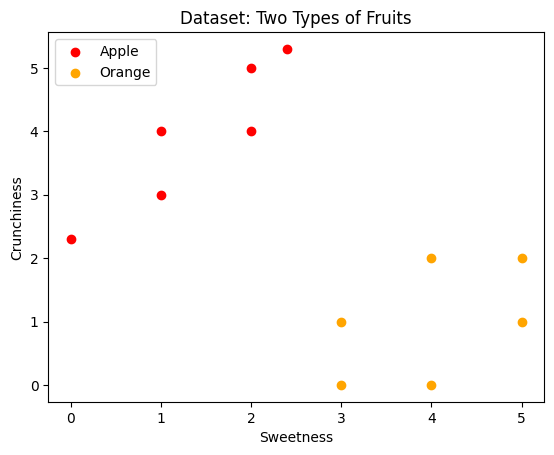

In [ ]:
import matplotlib.pyplot as plt
# -------------------------------
# 2. Plot dataset
# -------------------------------
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Apple')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', label='Orange')
plt.xlabel("Sweetness")
plt.ylabel("Crunchiness")
plt.legend(loc = 'upper left')
plt.title("Dataset: Two Types of Fruits")
plt.show()


In [9]:
from sklearn import svm
# -------------------------------
# 3. Fit the SVM
# -------------------------------
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# -------------------------------
# 4. Extract decision boundary
# -------------------------------
w = clf.coef_[0]
b = clf.intercept_[0]

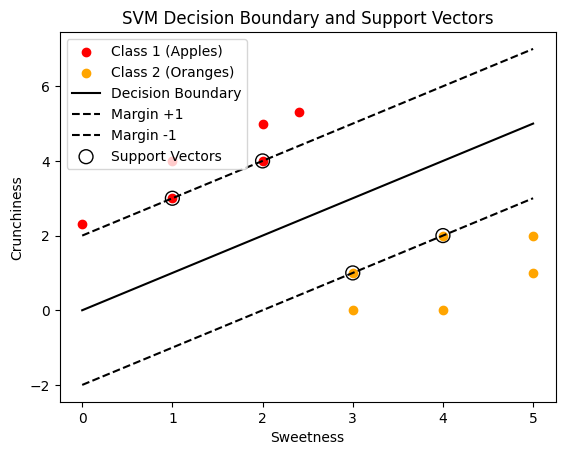

In [11]:
def decision_line(x_vals, offset=0):
    """Return y-values for decision line with optional offset (+/-1 margin)."""
    return (-w[0] * x_vals - b + offset) / w[1]

# -------------------------------
# 5. Visualize decision boundary
# -------------------------------
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1 (Apples)')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', label='Class 2 (Oranges)')

# Create x-range for lines
x_vals = np.linspace(0, 5, 10)

# Decision boundary
plt.plot(x_vals, decision_line(x_vals), 'k-', label='Decision Boundary')
# Margins
plt.plot(x_vals, decision_line(x_vals, offset=1), 'k--', label='Margin +1')
plt.plot(x_vals, decision_line(x_vals, offset=-1), 'k--', label='Margin -1')

# Support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel("Sweetness")
plt.ylabel("Crunchiness")
plt.legend(loc = 'upper left')
plt.title("SVM Decision Boundary and Support Vectors")
plt.show()